<a href="https://colab.research.google.com/github/DuckyBread/Exercise2/blob/master/light.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

In [2]:
url = "https://drive.google.com/uc?export=download&id=1IgxLFA5F9W_D9afYgUjzBsY4lPCqWX_T"
signal = pd.read_csv(url, sep='\n', header=None)
print (signal.head())
print (signal.tail())
print(signal.shape)

          0
0  39.09334
1  37.99574
2  39.50392
3  40.75022
4  37.31230
            0
995  31.49616
996  29.37969
997  32.28567
998  30.78766
999  31.53321
(1000, 1)


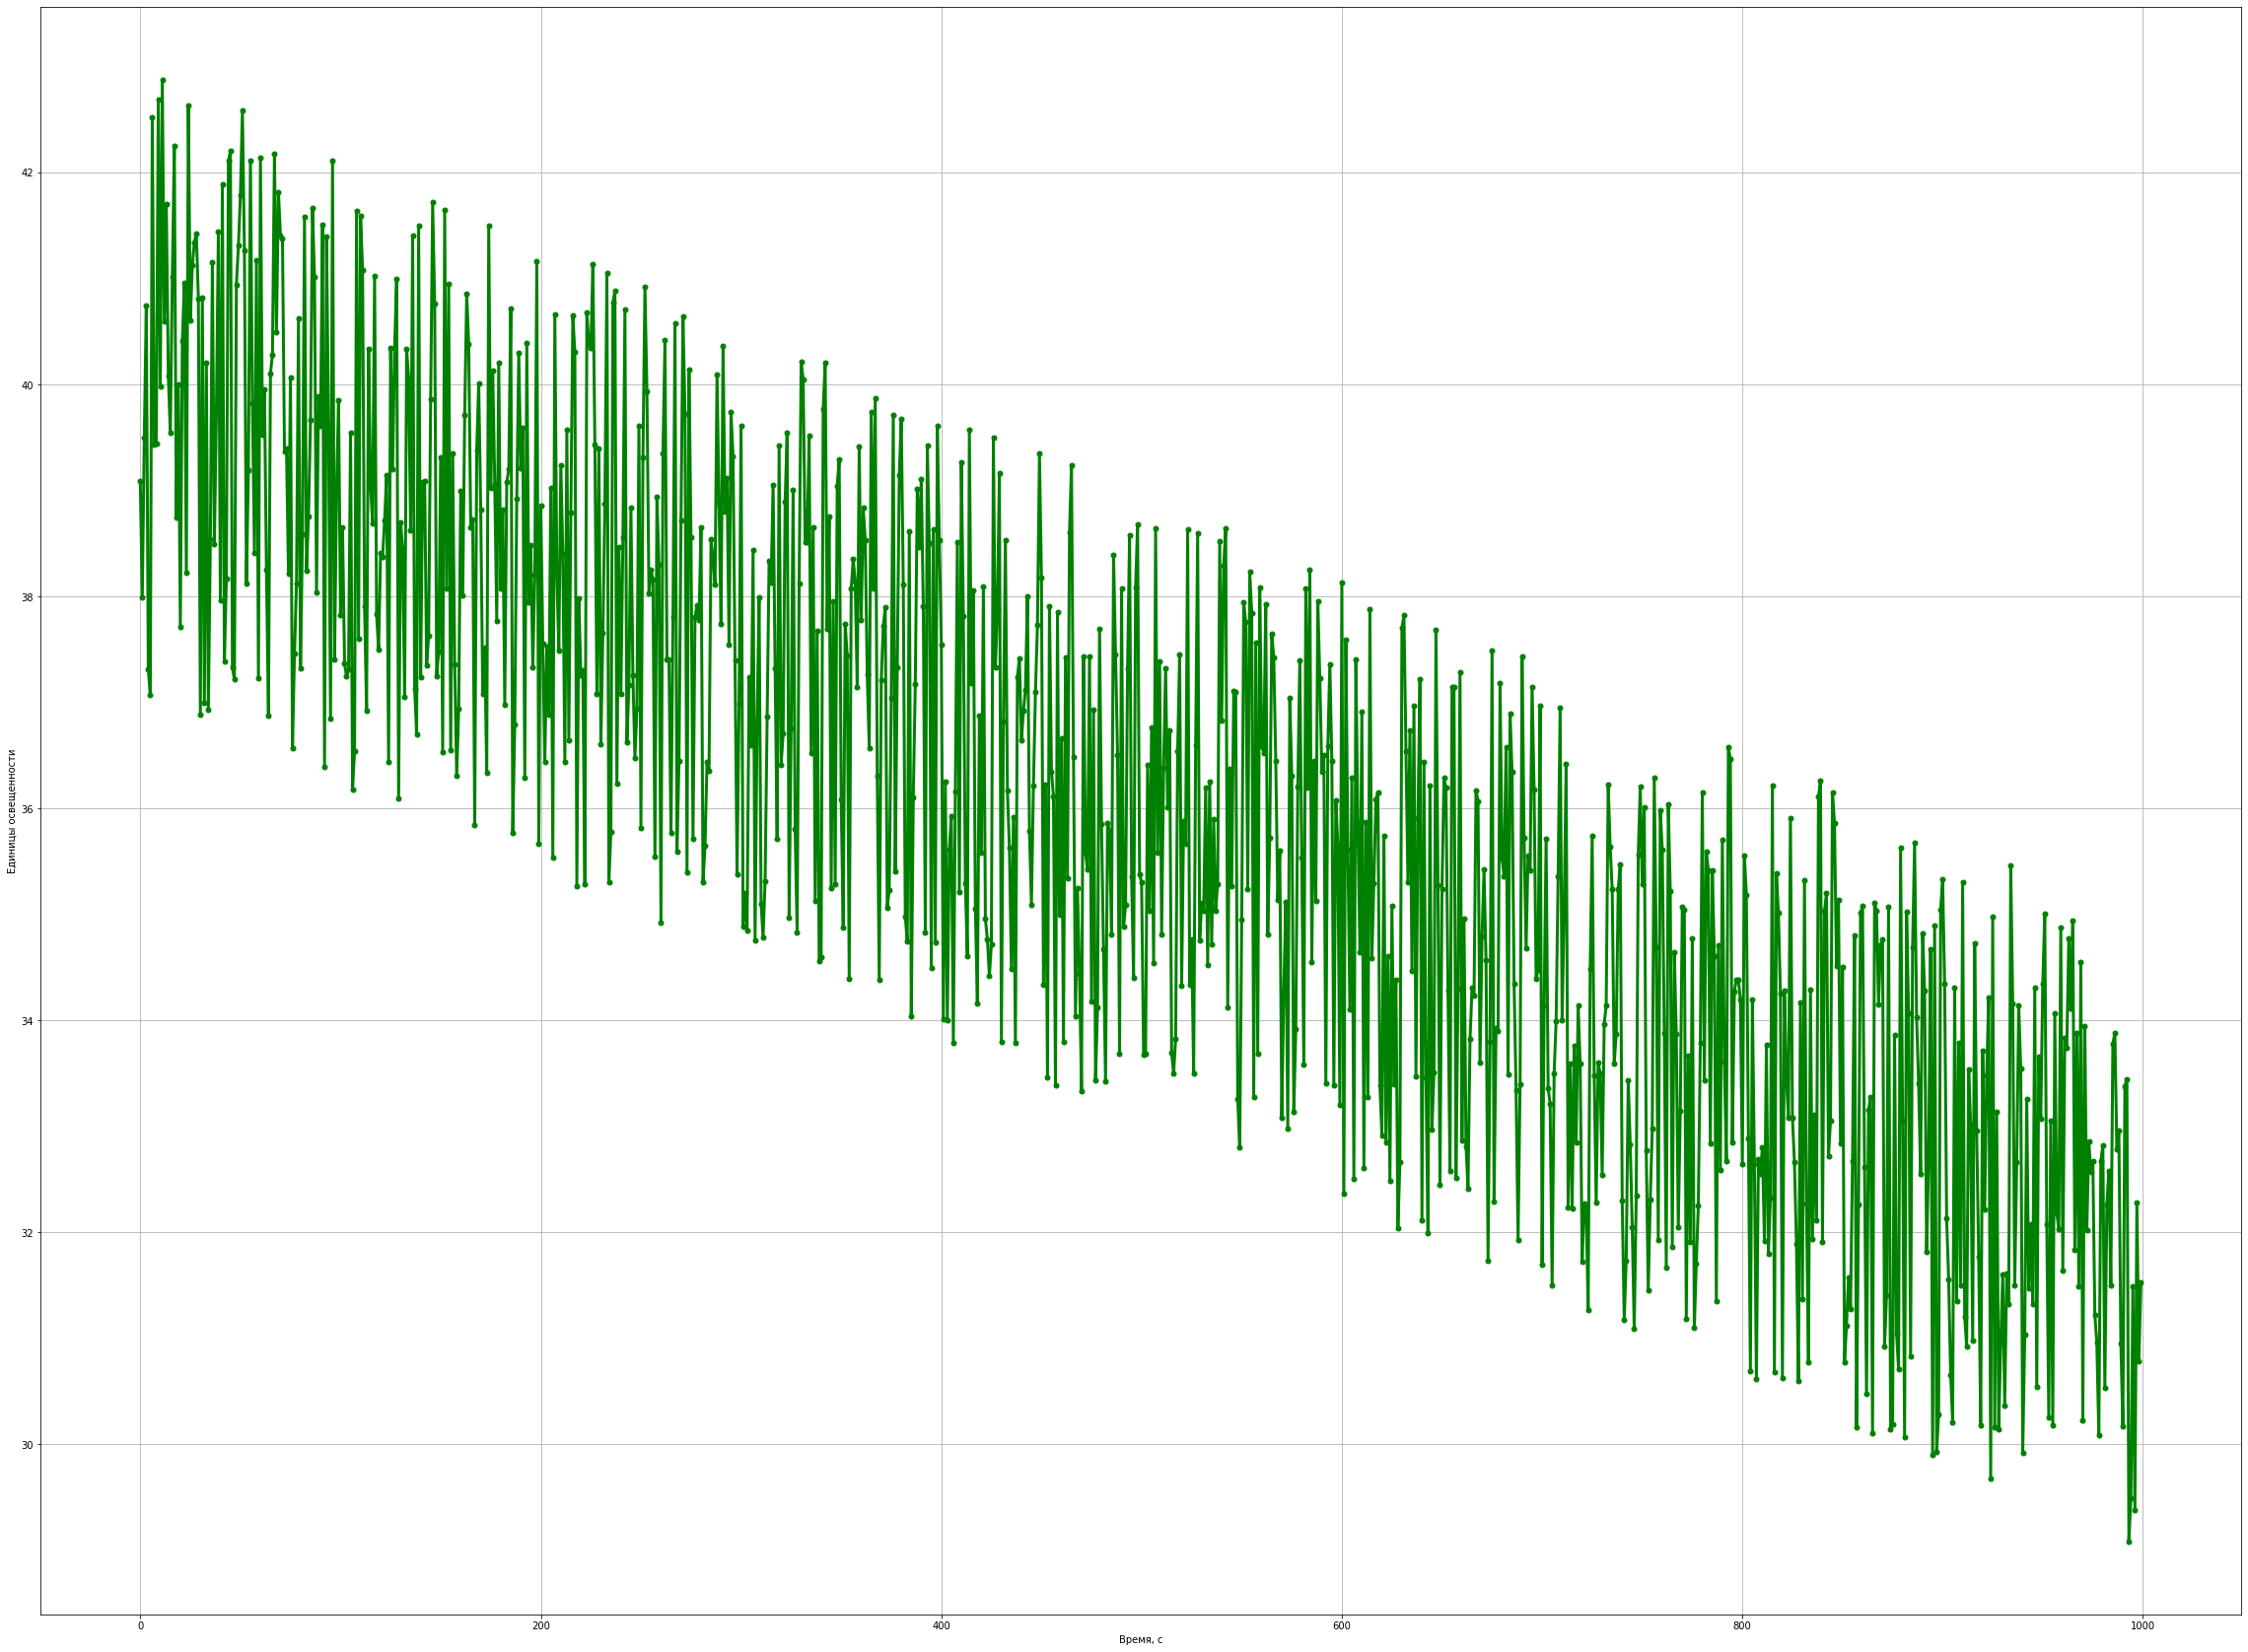

In [3]:
fig, ax =plt.subplots(figsize=(40,30))
ax.plot(signal, linewidth = 3, markersize = 5, marker = 'o', color = 'green')
ax.grid(True)
ax.set_xlabel('Время, c') 
ax.set_ylabel('Единицы освещенности')

plt.show()

In [4]:

lamp = np.zeros(len(signal))
signal_data = signal.values
type(signal_data)

numpy.ndarray

In [0]:

if signal_data[0] >35:
  lamp[0] = 0
else:
  lamp[0] = 1
if signal_data[len(signal)-1]>35:
  lamp[len(signal)-1] = 0
else:
  lamp[len(signal)-1] = 1

In [0]:
light_threshold = 35
k=1
a = len(signal)
a=a-2
for i in range(1,a):
  if signal_data[i] >= light_threshold:
    if signal_data[i-1] >= light_threshold:
      lamp[i]=0
      k+=1
    else:
      if signal_data[i+1]>=light_threshold:
        lamp[i]=0
        k=0
      else:
        if k>0:
          if lamp[i-1]>0:
            lamp[i]=1
            k+=1
          else:
            lamp[i]=0
            k+=1
  else:                                        # i сигнал меньше 35
    if signal_data[i-1]<light_threshold:                    # i-1 сигнал меньше 35
      if signal_data[i+1]<light_threshold:                  # i+1 сигнал меньше 35
        lamp[i]=1
        k+=1
    else:                                      # i-1 сигнал больше 35
      if signal_data[i+1]<light_threshold:                  # i+1 сигнал меньше 35
        lamp[i]=1
        k=0
      else:                                    # i+1 сигнал больше 35
        if k>0:
          if lamp[i-1] > 0:
            lamp[i]=1
            k+=1
          else:
            lamp[i]=0
            k+=1

Text(0.5, 0, 'Время, c')

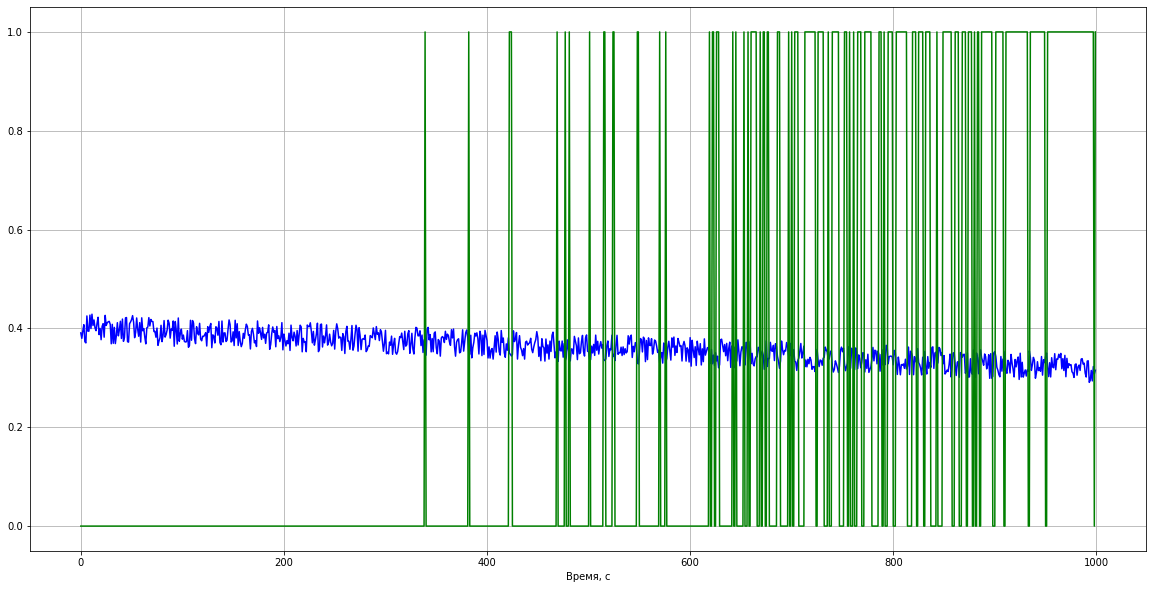

In [7]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(signal_data*0.01, 'blue')
ax.plot(lamp, 'green')


ax.grid(True)
ax.set_xlabel('Время, c') 

In [40]:
p = figure(plot_width = 800, plot_height = 400)
c=signal_data.ravel()
p.line(np.arange(len(signal)), c*0.01, line_width = 2, color='blue')
p.scatter(np.arange(len(signal)), c*0.01)
p.line(np.arange(len(signal)), lamp, line_width = 2, color = 'green')
p.scatter(np.arange(len(signal)), lamp, color = 'green')

show(p)

(1000,)
